In [43]:
#to get qiskit version
from qiskit import *
version='0.14.1',{'qiskit-terra': '0.14.1', 'qiskit-aer': '0.5.1', 'qiskit-ignis': '0.3.0', 'qiskit-ibmq-provider': '0.7.0', 'qiskit-aqua': '0.7.0', 'qiskit': '0.19.1'}
yourVersion=(qiskit.__version__ , qiskit.__qiskit_version__)
if yourVersion == version:
    print("you are using the same version")
else:
    print("your version : ","\nqiskit.__version__ : ",yourVersion[0],"\nqiskit.__qiskit_version__ : ", yourVersion[1])
    print("\ninstall version : ","\nqiskit.__version__ : ",version[0],"\nqiskit.__qiskit_version__ : ", version[1])

you are using the same version


In [2]:
# for development process

def matrixLatex(matrix):
    from IPython.display import display, Markdown
    gate_latex = '\\begin{pmatrix}'
    for line in matrix:
        for element in line:
            gate_latex += str(element) + '&'
        gate_latex  = gate_latex[0:-1]
    
        gate_latex +=  ' \\\\ '
    gate_latex  = gate_latex[0:-4]
    gate_latex += '\end{pmatrix}'
    return display(Markdown(gate_latex))

# results


In [3]:
# this function returns the state vector of a circuit

# important note .. "according to Qiskit’s convention, first qubit is on the right-hand side"
# ex: |01⟩  .. 1st qubit is 1 and 2nd qubit is 0
# so we can correct that by by using reversedStateVector() function
# you can check that here - https://qiskit-staging.mybluemix.net/documentation/terra/summary_of_quantum_operations.html

def stateVector(circuit):
    from qiskit import Aer
    from qiskit import execute
    
    simulator=Aer.get_backend('statevector_simulator')
    result=execute(circuit,backend=simulator).result()
    statevector=result.get_statevector(decimals=4)
    return statevector.tolist()

#testing
from qiskit import *

qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

#circuit.h(0)
circuit.x(0)

circuit.measure(qr,cr)

stateVector(circuit)

[0j, (1+0j), 0j, 0j]

In [4]:
# this function returns the state vector for the reversed wires   ex..  factor of |001⟩ will be the factor of |100⟩ 
# to correct qiskit convention
# according to Qiskit’s convention, first qubit is on the right-hand side
# ex: |01⟩  .. 1st qubit is 1 and 2nd qubit is 0

def reversedStateVector(statevector,num_qubits):
    reversedStateVector=[]
    for i in range(len(statevector)):
        pos=int(''.join(reversed(str(("{0:0"+str(num_qubits).replace('.0000','')+"b}").format(i)))),2)
        reversedStateVector.append(statevector[pos])
    return reversedStateVector

from qiskit import *

qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

#circuit.h(0)
circuit.x(0)

circuit.measure(qr,cr)

statevector=stateVector(circuit)
print("stateVector=         ",statevector)
print("reversedStateVector= ",reversedStateVector(statevector,circuit.num_qubits))

stateVector=          [0j, (1+0j), 0j, 0j]
reversedStateVector=  [0j, 0j, (1+0j), 0j]


In [5]:
# function to enhance dirac notation and matrix representation numbers

def numberFormat(num,isImag=False):
    string=str(num)
    if float(string)!=0:
        if float(string)>0:
            string="+" if string=="1" else "+"+string
        else:
            string="-" if string=="-1" else string
        return string+"i" if isImag else string
    return ""

In [6]:
# this function returns dirac notation of the circuit
# neglects terms with zero probability
# four digits after floating point

# important note .. "according to Qiskit’s convention, first qubit is on the right-hand side"
# ex: |01⟩  .. 1st qubit is 1 and 2nd qubit is 0
# we corrected that by passing reversedWires=True


def diracNotation(circuit,reversedWires=True):
    statevector=stateVector(circuit)
    if reversedWires:
        statevector=reversedStateVector(statevector,circuit.num_qubits)
    diracNotation=""
    for i in range(len(statevector)):
        if statevector[i]==0:
            continue
        diracNotation+=numberFormat(statevector[i].real)
        diracNotation+=numberFormat(statevector[i].imag,True)
        diracNotation+="|"+str(("{0:0"+str(circuit.num_qubits).replace('.0000','')+"b}").format(i))+"⟩ "
    return diracNotation.lstrip("+")

#testing
from qiskit import *
qr=QuantumRegister(3)
cr=ClassicalRegister(3)
circuit=QuantumCircuit(qr,cr)

#circuit.x(0)
#circuit.y(0)
circuit.h(0)
circuit.cx(0,1)

#circuit.measure(qr,cr)

print(diracNotation(circuit,True))

0.7071|000⟩ +0.7071|110⟩ 


In [7]:
# this function returns readable matrix representation of the whole system
# four digits after floating point

# circuit mustn't be measured
# we use "remove_final_measurements()" function to remove measurments
# measurements between gates leed to an error (we cann't get matrix representation for these circuits) (need to check)
# including the initialization gates (need to check)

def matrixRepresentation(circuit):
    from qiskit import Aer
    from qiskit import execute

    temp = circuit.copy()
    temp.remove_final_measurements()

    simulator = Aer.get_backend('unitary_simulator')
    result = execute(temp, backend=simulator).result()
    unitary = result.get_unitary(decimals=4).tolist()
    #print(unitary)
    for i in range(len(unitary)):
        for j in range(len(unitary[i])):
            if unitary[i][j]==0:
                unitary[i][j]="0"
            else:
                string=str(unitary[i][j].real)
                string="" if float(string)==0 else string
                string+=numberFormat(unitary[i][j].imag,True)
                unitary[i][j]=string.lstrip("+")
    return unitary

#testing
from qiskit import *
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

circuit.h(0)
circuit.x(1)
#circuit.rx(1.57,2)

#circuit.cx(0,1)
#circuit.measure(qr,cr)
matrixLatex(matrixRepresentation(circuit))

\begin{pmatrix}0&0&0.7071&0.7071 \\ 0&0&0.7071&-0.7071 \\ 0.7071&0.7071&0&0 \\ 0.7071&-0.7071&0&0\end{pmatrix}

In [8]:
# inverse the arrange of gates in tensor product

# important note .. "according to Qiskit’s convention, first qubit is on the right-hand side"
# ex: |01⟩  .. 1st qubit is 1 and 2nd qubit is 0
# we corrected that by passing using reversedMatrix() function

def reversedMatrix(matrix,num_qubits):
    reversedMatrix=[]
    for i in range(len(matrix)):
        reversedMatrix.append([])
        pos=int(''.join(reversed(str(("{0:0"+str(num_qubits).replace('.0000','')+"b}").format(i)))),2)
        tempList=matrix[pos]
        for j in range(len(tempList)):
            pos=int(''.join(reversed(str(("{0:0"+str(num_qubits).replace('.0000','')+"b}").format(j)))),2)
            reversedMatrix[i].append(tempList[pos])
    return reversedMatrix

#testing
matrix=[[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]
print("normal")
matrixLatex(matrix)
print("reversed")
matrixLatex(reversedMatrix(matrix,2))

normal


\begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0\end{pmatrix}

reversed


\begin{pmatrix}1&0&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \\ 0&1&0&0\end{pmatrix}

In [9]:
# returns probability of |1⟩ for every wire in a list

def separatedProbabilities(statevector,num_qubits):
    res = []
    for j in range(num_qubits):
        val = 0
        for i in range(len(statevector)):
            pos = str(("{0:0"+str(num_qubits).replace('.0000', '')+"b}").format(i))
            if pos[j] == '1':
                val += abs(statevector[i])**2
        val = round(val*100, 2)
        res.insert(0, val)
    return res


#testing
from qiskit import *

qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

circuit.h(0)
#circuit.cx(0,1)
#circuit.h(0)
"""circuit.h(0)
circuit.cx(0,1)
"""
separatedProbabilities(stateVector(circuit),circuit.num_qubits)


[50.0, 0.0]

[1.00000016, 0.0, 0.0]


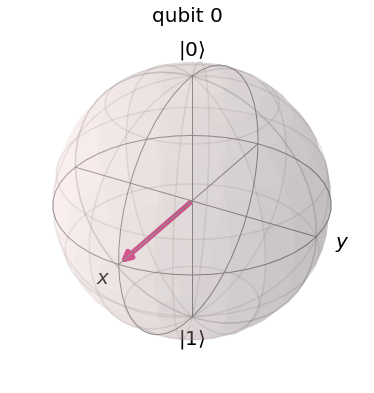

[0.0, 0.0, -1.00000016]


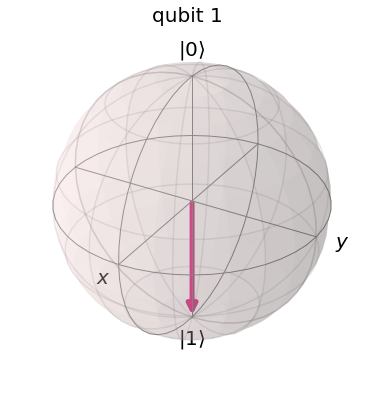

[0.0, -0.99999984, 0.0007999999999998564]


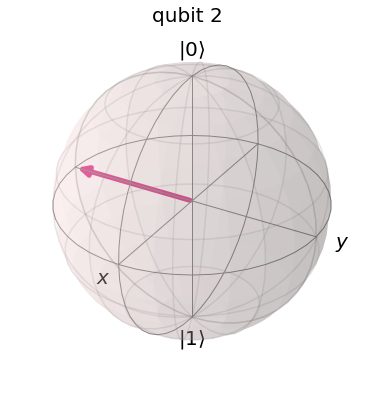

In [10]:
# returns polar coordinates for every wire to be represented on bloch spheres

def separatedBlochSpheres(circuit):
    from qiskit.quantum_info import partial_trace
    
    statevector=stateVector(circuit)
    pos=list(range(circuit.num_qubits))
    res=[]
    for i in range(circuit.num_qubits):
        [[a, b], [c, d]] = partial_trace(statevector, pos[:i]+pos[i+1:]).data
        x = 2*b.real
        y = 2*c.imag
        z = a.real-d.real
        res.append([x,y,z])
    return res
    
#testing
from qiskit import *
from qiskit.visualization import plot_bloch_vector
qr=QuantumRegister(3)
cr=ClassicalRegister(3)
circuit=QuantumCircuit(qr,cr)

    #print(pos)
circuit.h(0)
circuit.x(1)
circuit.rx(1.57,2)

#circuit.cx(0,1)
#circuit.measure(qr,cr)
res=separatedBlochSpheres(circuit)
for i in range(circuit.num_qubits):
    print(res[i])
    display(plot_bloch_vector(res[i],title="qubit "+str(i)))

In [11]:
# returns the probability of every state to be presented on the chart
# if the circuit is measured the returned data will be the exact data according to the result of every shot
# else the returned data will be the expected probabilities

def graph(circuit,numberOfShots):
    from qiskit import Aer
    from qiskit import execute
        
    temp = circuit.copy()
    temp.remove_final_measurements()
    graphData = []
    if temp == circuit:
        statevector=reversedStateVector(stateVector(circuit),circuit.num_qubits)
        for i in range(len(statevector)):
            state = str(("{0:0"+str(circuit.num_qubits).replace('.0000', '')+"b}").format(i))
            graphData.append([state,round(abs(statevector[i])**2, 4)])
        return graphData
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend=simulator,shots=numberOfShots).result()
    counts = result.get_counts(circuit)
    for i in range(2**circuit.num_qubits):
        state = str(("{0:0"+str(circuit.num_qubits).replace('.0000', '')+"b}").format(i))
        if state in counts:
            graphData.append([state,counts[state]/numberOfShots])
        else:
            graphData.append([state,0.0])
    return graphData



#testing
from qiskit import *
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

circuit.h(0)
circuit.x(1)
#circuit.rx(1.57,2)

#circuit.cx(0,1)
#circuit.measure(qr,cr)
graph(circuit,1024)
    

[['00', 0.0], ['01', 0.5], ['10', 0.0], ['11', 0.5]]

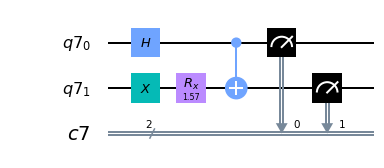

In [12]:
# drawing of the circuit
    
def draw(circuit):
    from qiskit import Aer
    from qiskit import execute

    simulator = Aer.get_backend('qasm_simulator')
    execute(circuit, backend=simulator).result()
    # %matplotlib inline
    return circuit.draw(output='mpl')

#testing
from qiskit import *
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

circuit.h(0)
circuit.x(1)
circuit.rx(1.57,1)

circuit.cx(0,1)
circuit.measure(qr,cr)
draw(circuit)

In [13]:
# runs a circuit on a real quantum computer (IBM Q devices) and returns a link of the results

def runOnIBMQ( API_TOKEN, circuit, shots, device):
    from qiskit import IBMQ
    from qiskit import execute
    IBMQ.enable_account(API_TOKEN)
    provider = IBMQ.get_provider('ibm-q')
    qcomp = provider.get_backend(device)
    job = execute(circuit, backend=qcomp, shots=shots)
    return "https://quantum-computing.ibm.com/results/"+job.job_id()

#testing
from qiskit import *
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

circuit.h(0)
circuit.cx(0,1)
#put your API_TOKEN 
API_TOKEN=""
runOnIBMQ(API_TOKEN,circuit,1024,"ibmq_16_melbourne")

RequestsApiError: '400 Client Error: Bad Request for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. API key not found., Error code: 3402.'

# create circuit

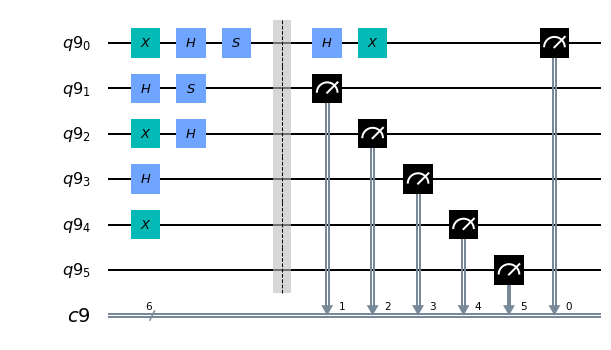

In [14]:
# this function takes list of initial states and apply equivalent gates

# important note .. "according to Qiskit’s convention, first qubit is on the right-hand side"
# ex: |01⟩  .. 1st qubit is 1 and 2nd qubit is 0
# so we corrected that by applying all gates in reverse order by bassing reversedWires=True if needed
# you can check that here - https://qiskit-staging.mybluemix.net/documentation/terra/summary_of_quantum_operations.html

# you can intialize your circuit with vector that represent your initialization
# to initialize two qubits with |1⟩ ( initialize a system of two wires by |11⟩  ) ... circuit.initialize([0,0,0,1],[0,1])

# qiskit always start with |0⟩ state
# |1⟩ state equivalent to X|0⟩
# |+⟩ state equivalent to H|0⟩
# |-⟩ state equivalent to H|1⟩ = HX|0⟩
# |i⟩ = |↻⟩ state equivalent to S|+⟩ = SH|0⟩
# |-i⟩ = |↺⟩ state equivalent to S|-⟩ = SH|1⟩ = SHX|0⟩

# dirac notation doc - https://docs.microsoft.com/en-us/quantum/concepts/dirac-notation

def initState(circuit,stateList,reversedWires=False):
    if reversedWires:
        stateList=stateList[::-1]
    for i in range(len(stateList)):
        if str(stateList[i]) == "0":
            continue
        elif str(stateList[i]) == "1":
            circuit.x(i)
        elif stateList[i] == "+":
            circuit.h(i)
        elif stateList[i] == "-":
            circuit.x(i)
            circuit.h(i)
        elif stateList[i] == "i":
            circuit.h(i)
            circuit.s(i)
        elif stateList[i] == "-i":
            circuit.x(i)
            circuit.h(i)
            circuit.s(i)
    circuit.barrier()
    return circuit
    
    
#testing
from qiskit import *

qr=QuantumRegister(6)
cr=ClassicalRegister(6)
circuit=QuantumCircuit(qr,cr)

initState(circuit,["0","1","+","-","i","-i"],True)

circuit.h(0)
circuit.x(0)

circuit.measure(qr,cr)
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator).result()

circuit.draw(output='mpl')

matrix


\begin{pmatrix}1&0&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \\ 0&1&0&0\end{pmatrix}

output


\begin{pmatrix}1.0&0&0&0&0&0&0&0 \\ 0&0&0&1.0&0&0&0&0 \\ 0&0&1.0&0&0&0&0&0 \\ 0&1.0&0&0&0&0&0&0 \\ 0&0&0&0&1.0&0&0&0 \\ 0&0&0&0&0&0&0&1.0 \\ 0&0&0&0&0&0&1.0&0 \\ 0&0&0&0&0&1.0&0&0\end{pmatrix}

reversed output


\begin{pmatrix}1.0&0&0&0&0&0&0&0 \\ 0&1.0&0&0&0&0&0&0 \\ 0&0&1.0&0&0&0&0&0 \\ 0&0&0&1.0&0&0&0&0 \\ 0&0&0&0&0&0&1.0&0 \\ 0&0&0&0&0&0&0&1.0 \\ 0&0&0&0&1.0&0&0&0 \\ 0&0&0&0&0&1.0&0&0\end{pmatrix}

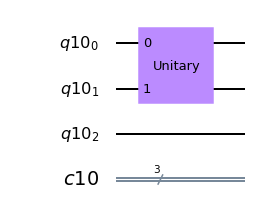

In [15]:
# this function applies a matrix (custom gate) to a circuit in reverse order of positions
# positions must be list with numbers
# we must check unitary before storing it
# to check unitary use  "is_unitary_matrix(data)"

# important note .. "according to Qiskit’s convention, first qubit is on the right-hand side"
# ex: |01⟩  .. 1st qubit is 1 and 2nd qubit is 0
# keep in mind that the matrix entered in correct order (left to right qubits)
# so to correct the qiskit order we need to shift the custom matrix to the end (newPos=numOfQubits-pos-1 )
# you can check that here - https://qiskit-staging.mybluemix.net/documentation/terra/summary_of_quantum_operations.html

def addCustomGate(circuit, gateMatrix, positions,reversedWires=False):
    if reversedWires:
        for i in range(len(positions)):
            positions[i]=circuit.num_qubits-positions[i]-1
    from qiskit.quantum_info.operators import Operator
    customGate = Operator(gateMatrix)
    circuit.unitary(customGate, positions)
    
    
#testing
from qiskit import *

qr=QuantumRegister(3)
cr=ClassicalRegister(3)
circuit=QuantumCircuit(qr,cr)

matrix=[[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]

from qiskit.quantum_info.operators.predicates import is_unitary_matrix

#print(is_unitary_matrix(matrix))

matrix=reversedMatrix(matrix,2)
print("matrix")
matrixLatex(matrix)

#addCustomGate(circuit,matrix,[0,1],True)
addCustomGate(circuit,matrix,[0,1],False)


print("output")             
matrixLatex(matrixRepresentation(circuit))
print("reversed output")
matrixLatex(reversedMatrix(matrixRepresentation(circuit),circuit.num_qubits))

circuit.draw(output='mpl')


In [16]:
# constructs a matrix to represent controlled gates 

def controlledGate(unitary, numOfControls=1,reversedWires=True):
    from math import log2

    old = len(unitary)
    num_qubits=int(log2(old)+numOfControls)
    new = 2**num_qubits
    controlledGate = []

    for i in range(new):
        controlledGate.append([])
        for j in range(new):
            if (i >= new-old) and (j >= new-old):
                controlledGate[i].append(unitary[i-new+old][j-new+old])
            elif i == j:
                controlledGate[i].append(1)
            else:
                controlledGate[i].append(0)

    if reversedWires:
        controlledGate=reversedMatrix(controlledGate,num_qubits)
    return controlledGate

#testing
unitary=[[0,1],[1,0]]
matrixLatex(controlledGate(unitary,1,True))
matrixLatex(controlledGate(unitary,1,False))



\begin{pmatrix}1&0&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \\ 0&1&0&0\end{pmatrix}

\begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0\end{pmatrix}

In [17]:
# this function takes name of a gate (str)
# and returns the matrix of the gate

def gateToMatrix(gate,radian=True):
    from qiskit import QuantumCircuit
    from qiskit import Aer
    from qiskit import execute
    if gate == "swap":
        circuit = QuantumCircuit(2)
        circuit.swap(0, 1)
    elif "(" in gate:
        circuit = QuantumCircuit(1)
        angle = gate[:-1]
        if not radian:
            angle = gate[0:3]+str((float(gate[3:-1])*3.14)/180)
        pythonLine = "circuit."+angle+",0)"
        exec(pythonLine)
    else:
        circuit = QuantumCircuit(1)
        exec("circuit."+gate+"(0)")
    simulator = Aer.get_backend('unitary_simulator')
    result = execute(circuit, backend=simulator).result()
    return result.get_unitary()

#testing
matrixLatex(gateToMatrix("swap"))
matrixLatex(gateToMatrix("x"))
matrixLatex(gateToMatrix("rx(90)",radian=False))
matrixLatex(gateToMatrix("rx(1.57)",radian=True))
print(gateToMatrix("rx(180)",radian=False)==gateToMatrix("rx(3.14)",radian=True))

\begin{pmatrix}(1+0j)&0j&0j&0j \\ 0j&0j&(1+0j)&0j \\ 0j&(1+0j)&0j&0j \\ 0j&0j&0j&(1+0j)\end{pmatrix}

\begin{pmatrix}0j&(1+0j) \\ (1+0j)&0j\end{pmatrix}

\begin{pmatrix}(0.7073882691671998+0j)&(-4.328055977987173e-17-0.706825181105366j) \\ (4.328055977987173e-17-0.706825181105366j)&(0.7073882691671998+0j)\end{pmatrix}

\begin{pmatrix}(0.7073882691671998+0j)&(-4.328055977987173e-17-0.706825181105366j) \\ (4.328055977987173e-17-0.706825181105366j)&(0.7073882691671998+0j)\end{pmatrix}

[[ True  True]
 [ True  True]]


In [18]:
# this function returns the positions of the multi-Qubit custom gates
# remove the other gates to prevent applying the gate multiple times
    
def multiQubitCustomGate(column,firstAppear,customGates):
    from math import log2
    pointPos=column[firstAppear].find(".")
    index=int(column[firstAppear][pointPos+1:])
    gateName=column[firstAppear][7:pointPos]
    size = log2(len(customGates[gateName]))
    pos = [None]*int(size)
    pos[index]=firstAppear
    for i in range(firstAppear+1, len(column)):
        if "custom_"+gateName == column[i][:pointPos]:
            index=int(column[i][pointPos+1:])
            pos[index]=i
            column[i] = "i"
    return column, pos

#testing

column=["i","i","custom_cnot.1","i","custom_cnot.0","i"]
start=2
customGates={"cnot":[[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]}
print(multiQubitCustomGate(column, start, customGates))

column=["i","custom_test.2","custom_test.1","i","custom_test.0","i"]
start=1
customGates={"test":[[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0],[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0]]}
print(multiQubitCustomGate(column, start, customGates))

column=["i","custom_test.0","i","i","i","i"]
start=1
customGates={"test":[[0,1],[1,0]]}
print(multiQubitCustomGate(column, start, customGates))

(['i', 'i', 'custom_cnot.1', 'i', 'i', 'i'], [4, 2])
(['i', 'custom_test.2', 'i', 'i', 'i', 'i'], [4, 2, 1])
(['i', 'custom_test.0', 'i', 'i', 'i', 'i'], [1])


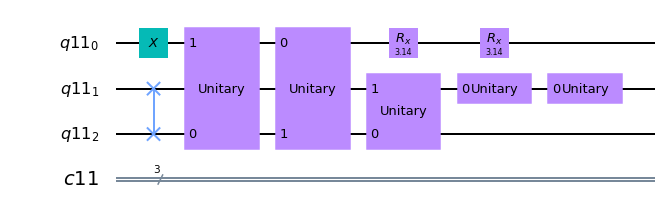

In [19]:
# this function applies noncontrolled gates on the circuit

def nonControlledColumns(circuit, column, customGates, radian):
    # naming a custom gate
    # don't accept "." in any position

    for i in range(len(column)):
        if str(column[i]) == "i":
            continue
        if str(column[i]) == "m":
            circuit.measure(i, i)
            continue
        if str(column[i])[:7] == "custom_":
            if customGates == None:
                print("send custom gates")
            else:
                end = str(column[i]).find(".")
                if end == -1:
                    end = len(column[i])
                gateName = str(column[i])[7:end]
                if len(customGates[gateName]) == 2:
                    addCustomGate(circuit, customGates[gateName], [i])
                    continue
                else:
                    column, pos = multiQubitCustomGate(column, i, customGates)
                    addCustomGate(circuit, customGates[gateName], pos)
                    continue
        if str(column[i]) == "swap":
            p1 = i
            for j in range(i+1, len(column)):
                if str(column[j]) == "swap":
                    p2 = j
                    column[j] = "i"
                    break
            circuit.swap(p1, p2)
            continue
        if "(" in str(column[i]):
            angle = column[i][:-1]
            if not radian:
                angle = column[i][0:3] + str((float(column[i][3:-1])*3.14)/180)

            pythonLine = "circuit."+angle+","+str(i)+")"
            exec(pythonLine)
            continue

        pythonLine = "circuit."+column[i]+"("+str(i)+")"
        # print(pythonLine)
        exec(pythonLine)
        
#testing
from qiskit import *

qr=QuantumRegister(3)
cr=ClassicalRegister(3)
circuit=QuantumCircuit(qr,cr)

column=["x","i","i"]
column2=["i","swap","swap"]

column3=["custom_cnot.1","i","custom_cnot.0"]
column9=["custom_cnot.0","i","custom_cnot.1"]
column4=["i","custom_cnot.1","custom_cnot.0"]

column5=["i","custom_test.0","i"]
column6=["i","custom_test","i"]

column7=["rx(3.14)","i","i"]
column8=["rx(180)","i","i"]

customGates={"cnot":[[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]],"test":[[0,1],[1,0]]}

nonControlledColumns(circuit, column, customGates, radian=False)
nonControlledColumns(circuit, column2, customGates, radian=False)
nonControlledColumns(circuit, column3, customGates, radian=False)
nonControlledColumns(circuit, column9, customGates, radian=False)
nonControlledColumns(circuit, column4, customGates, radian=False)
nonControlledColumns(circuit, column5, customGates, radian=False)
nonControlledColumns(circuit, column6, customGates, radian=False)
nonControlledColumns(circuit, column7, customGates, radian=True)
nonControlledColumns(circuit, column8, customGates, radian=False)

circuit.draw(output='mpl')


In [20]:
def controlledColumns(circuit, column, customGates, radian):
    c = []
    oc = []
    swapMatrix=[[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]
    nonControlledGates=["s","t","sdg","tdg"]
    n = circuit.num_qubits
    for i in range(len(column)):
        if str(column[i]) == "c":
            c.append(i)
            column[i] = "i"

        elif str(column[i]) == "oc":
            circuit.x(i)                             #open control
            oc.append(i)
            c.append(i)
            column[i] = "i"

    numOfControls = len(c)
    #print(numOfControls,column)

    for i in range(len(column)):
        if str(column[i]) == "i":
            continue
                
        if str(column[i])[:7] == "custom_":
            if customGates == None:
                print("send custom gates")
            else:
                end = str(column[i]).find(".")
                if end == -1:
                    end = len(column[i])
                gateName = str(column[i])[7:end]
                if len(customGates[gateName]) == 2:
                    pos = c+[i]
                else:
                    column, pos = multiQubitCustomGate(column, i, customGates)
                    pos = c+pos
                #print(pos)
                addCustomGate(circuit, controlledGate(customGates[gateName], numOfControls), pos)
                continue
        if str(column[i]) == "swap":
            p1 = i
            for j in range(i+1, len(column)):
                if str(column[j]) == "swap":
                    p2 = j
                    column[j] = "i"
                    break
            if numOfControls==1:
                circuit.cswap(c[0],p1, p2)
                continue
            pos = c+[p1]+[p2]
            addCustomGate(circuit, controlledGate(swapMatrix, numOfControls), pos)
            continue
        if numOfControls==1 and str(column[i]) not in nonControlledGates:
            if "(" in str(column[i]):
                angle = column[i][:-1]
                if not radian:
                    angle = column[i][0:3] + str((float(column[i][3:-1])*3.14)/180)
                pythonLine = "circuit.c"+angle+","+str(c[0])+","+str(i)+")"
                exec(pythonLine)
                continue
            pythonLine = "circuit.c"+str(column[i])+"("+str(c[0])+","+str(i)+")"
            # print(pythonLine)
            exec(pythonLine)
            continue
        if numOfControls==2 and str(column[i])=="x":
            circuit.ccx(c[0],c[1],i)
            continue
        pos = c+[i]
        addCustomGate(circuit,controlledGate(gateToMatrix(column[i], radian), numOfControls), pos)

    for i in oc:                                     # open control
        circuit.x(i)
            
            
#testing
from qiskit import *

qr=QuantumRegister(5)
cr=ClassicalRegister(5)
circuit=QuantumCircuit(qr,cr)

column=["x","oc","i","i","i"]
column2=["c","x","i","i","i"]
column3=["c","c","x","i","i"]
column4=["c","x","c","i","i"]
column5=["c","x","c","c","i"]

column6=["c","swap","swap","i","i"]
column7=["c","swap","swap","c","i"]

column8=["rx(3.14)","c","i","i","i"]
column9=["c","i","i","rx(180)","i"]

column10=["custom_cnot.1","c","custom_cnot.0","i","i"]
column11=["c","custom_cnot.0","custom_cnot.1","i","i"]
column12=["i","custom_test.0","i","c","i"]
column13=["c","custom_test","i","i","i"]


customGates={"cnot":[[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]],"test":[[0,1],[1,0]]}

controlledColumns(circuit, column, customGates, radian=False)
controlledColumns(circuit, column2, customGates, radian=False)
controlledColumns(circuit, column3, customGates, radian=False)
controlledColumns(circuit, column4, customGates, radian=False)
controlledColumns(circuit, column5, customGates, radian=False)
controlledColumns(circuit, column6, customGates, radian=False)
controlledColumns(circuit, column7, customGates, radian=False)
controlledColumns(circuit, column8, customGates, radian=True)
controlledColumns(circuit, column9, customGates, radian=False)
controlledColumns(circuit, column10, customGates, radian=False)
controlledColumns(circuit, column11, customGates, radian=True)
controlledColumns(circuit, column12, customGates, radian=False)
controlledColumns(circuit, column13, customGates, radian=False)

circuit.draw()


┌───┐                    ┌──────────┐   ┌──────────┐┌──────────┐»
q12_0: ─────┤ X ├───────■────■────■──┤0         ├─■─┤0         ├┤ RX(3.14) ├»
       ┌───┐└─┬─┘┌───┐┌─┴─┐  │  ┌─┴─┐│          │ │ │          │└────┬─────┘»
q12_1: ┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤3         ├─X─┤2         ├─────■──────»
       └───┘     └───┘└───┘┌─┴─┐└─┬─┘│  unitary │ │ │  unitary │            »
q12_2: ────────────────────┤ X ├──■──┤1         ├─X─┤3         ├────────────»
                           └───┘     │          │   │          │            »
q12_3: ──────────────────────────────┤2         ├───┤1         ├────────────»
                                     └──────────┘   └──────────┘            »
q12_4: ─────────────────────────────────────────────────────────────────────»
                                                                            »
c12_0: ═════════════════════════════════════════════════════════════════════»
                                                                            »
c12_1: ═════════════════════════════════════════════════════════════════════»
                                                                            »
c12_2: ═════════════════════════════════════════════════════════════════════»
                                                                            »
c12_3: ═════════════════════════════════════════════════════════════════════»
                                                                            »
c12_4: ═════════════════════════════════════════════════════════════════════»
                                                                            »
«                   ┌──────────┐┌──────────┐            ┌──────────┐
«q12_0: ─────■──────┤2         ├┤0         ├────────────┤0         ├
«            │      │          ││          │┌──────────┐│  unitary │
«q12_1: ─────┼──────┤0 unitary ├┤1 unitary ├┤1         ├┤1         ├
«            │      │          ││          ││          │└──────────┘
«q12_2: ─────┼──────┤1         ├┤2         ├┤  unitary ├────────────
«       ┌────┴─────┐└──────────┘└──────────┘│          │            
«q12_3: ┤ RX(3.14) ├────────────────────────┤0         ├────────────
«       └──────────┘                        └──────────┘            
«q12_4: ────────────────────────────────────────────────────────────
«                                                                   
«c12_0: ════════════════════════════════════════════════════════════
«                                                                   
«c12_1: ════════════════════════════════════════════════════════════
«                                                                   
«c12_2: ════════════════════════════════════════════════════════════
«                                                                   
«c12_3: ════════════════════════════════════════════════════════════
«                                                                   
«c12_4: ════════════════════════════════════════════════════════════
«

# features

In [21]:
def strToComplex(matrix):
    import copy
    matrixCopy=copy.deepcopy(matrix)
    for i in range(len(matrixCopy)):
        for j in range(len(matrixCopy[i])):
            if(type(matrixCopy[i][j]) == type("")):
                matrixCopy[i][j] = matrixCopy[i][j].replace("i", "j")
                matrixCopy[i][j] = complex(matrixCopy[i][j])
    return matrixCopy


#testing
x=[["0","1"],["1","0"]]
test=[["0+1i","1+0i"],["1+0i","0+1i"]]
print(strToComplex(x))
print(strToComplex(test))

[[0j, (1+0j)], [(1+0j), 0j]]
[[1j, (1+0j)], [(1+0j), 1j]]


In [22]:
def complexToStr(matrix):
    import numpy as np
    import copy
    matrixCopy=copy.deepcopy(matrix)
    for i in range(len(matrixCopy)):
        for j in range(len(matrixCopy[i])):
            if(type(matrixCopy[i][j]) == type(0j)):
                matrixCopy[i][j] = str(np.around(matrixCopy[i][j],4)).replace("j","i")
    return matrixCopy

#testing
x=[[0,1],[1,0]]
test=[[0+1j,1+0j],[1+0j,0+1j]]
print(complexToStr(x))
print(complexToStr(test))

[[0, 1], [1, 0]]
[['1i', '(1+0i)'], ['(1+0i)', '1i']]


In [23]:
def sqrt( gate):
    import numpy as np
    from scipy.linalg import fractional_matrix_power
    a = np.matrix(gate)
    return fractional_matrix_power(a, 0.5).tolist()

#testing
x=[[0,1],[1,0]]
matrixLatex(sqrt(x))

\begin{pmatrix}(0.4999999999999999+0.4999999999999999j)&(0.4999999999999999-0.4999999999999999j) \\ (0.4999999999999999-0.4999999999999999j)&(0.4999999999999999+0.4999999999999999j)\end{pmatrix}

In [24]:
def elementaryGates(rows, customGates):
    for matrix in customGates.values():
        strToComplex(matrix)
    import numpy as np
    #print(rows)
    columns = np.transpose(rows).tolist()
    #print(columns)
    i = 0
    while i < len(columns):
        c = []
        for j in range(len(columns[i])):
            if columns[i][j] == "i":
                continue
            if columns[i][j] == "c" or columns[i][j] == "oc":
                c.append(j)
            else:
                gatePos = j
        if len(c) > 1:
            if columns[i][gatePos][7:] in customGates:
                gateMatrix = customGates[columns[i][gatePos][7:]]
            else:
                gateMatrix =gateToMatrix(columns[i][gatePos])
            if columns[i][gatePos][:7] == "custom_":
                end = columns[i][gatePos].find(".")
                #print(columns[i][gatePos], end)
                if end == -1:
                    name = "√("+columns[i][gatePos][7:]+")"
                else:
                    name = "√("+columns[i][gatePos][7:end]+")"
            else:
                name = "√("+columns[i][gatePos]+")"
            if name not in customGates:
                customGates[name] =sqrt(np.array(gateMatrix))
            name2 = name+"†"
            if name2 not in customGates:
                customGates[name2] = np.matrix(
                    customGates[name]).getH().tolist()

            col = ["i"]*len(columns[i])
            col[c[0]] = columns[i][c[0]]
            col[gatePos] = "custom_"+name
            for k in range(len(c)-2):
                col[c[k+2]] = columns[i][c[k+2]]
            columns.insert(i+1, col)

            col = ["i"]*len(columns[i])
            col[c[0]] = columns[i][c[0]]
            col[c[1]] = "x"
            for k in range(len(c)-2):
                col[c[k+2]] = columns[i][c[k+2]]
            columns.insert(i+1, col)

            col = ["i"]*len(columns[i])
            col[c[1]] = columns[i][c[1]]
            col[gatePos] = "custom_"+name2
            for k in range(len(c)-2):
                col[c[k+2]] = columns[i][c[k+2]]
            columns.insert(i+1, col)

            col = ["i"]*len(columns[i])
            col[c[0]] = columns[i][c[0]]
            col[c[1]] = "x"
            for k in range(len(c)-2):
                col[c[k+2]] = columns[i][c[k+2]]
            columns.insert(i+1, col)

            col = ["i"]*len(columns[i])
            col[c[1]] = columns[i][c[1]]
            col[gatePos] = "custom_"+name
            for k in range(len(c)-2):
                col[c[k+2]] = columns[i][c[k+2]]
            columns.insert(i+1, col)

            del columns[i]

        if len(c) == 2:
            i = i+4
        elif len(c) > 2:
            i = i-1
        i = i+1

    for matrix in customGates.values():
        # print(matrix)
        complexToStr(matrix)

        """colsss=[]    
        for i in range(len(columns)):
            if "custom_√(√(x))" in columns[i] or "custom_√(√(x))†" in columns[i] or "x" in columns[i]:
                colsss.append( columns[i])
        colsss.reverse()"""
        return {"rows": np.transpose(columns).tolist(), "custom": customGates}
    
#testing
rows=[['c'], ['c'], ['x']]
res=elementaryGates(rows,{})
print("rows:",res["rows"])
for i in res["custom"]:
    print(i)
    matrixLatex(res["custom"][i])

rows: [['i', 'c', 'i', 'c', 'c'], ['c', 'x', 'c', 'x', 'i'], ['custom_√(x)', 'i', 'custom_√(x)†', 'i', 'custom_√(x)']]
√(x)


\begin{pmatrix}(0.49999999999999983+0.5000000000000002j)&(0.49999999999999956-0.5000000000000002j) \\ (0.4999999999999996-0.5000000000000003j)&(0.5000000000000001+0.5000000000000003j)\end{pmatrix}

√(x)†


\begin{pmatrix}(0.49999999999999983-0.5000000000000002j)&(0.4999999999999996+0.5000000000000003j) \\ (0.49999999999999956+0.5000000000000002j)&(0.5000000000000001-0.5000000000000003j)\end{pmatrix}

[['x', 'i', 'i'], ['barrier', 'barrier', 'barrier'], ['syndrome', 'syndrome', 'syndrome'], ['m', 'i', 'i'], ['i', 'm', 'i'], ['x', 'i', 'i'], ['m', 'i', 'i'], ['i', 'i', 'x'], ['i', 'x', 'i'], ['i', 'm', 'i'], ['i', 'i', 'm']]


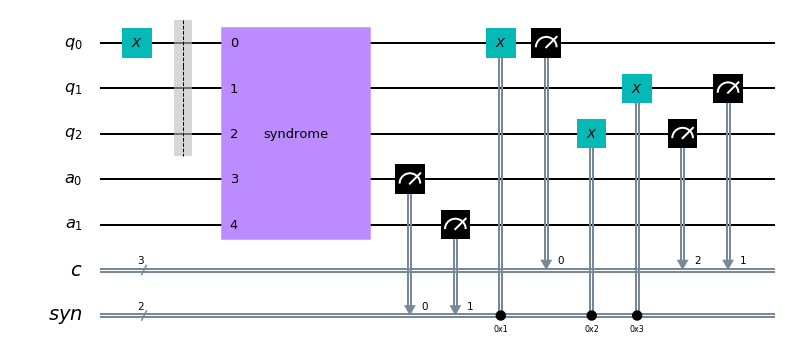

In [25]:
# this function returns gates of the circuit
# issue .. we can't get the value of the angles  ex.. rx(3.14) returned rx
# also we can't get "if" 
# separated qregs problem

def getGates(circuit):
    cols = []
    # print(circuit.data[0][1][0].register.size)
    for i in range(len(circuit.data)):
        name = circuit.data[i][0].name
        # print(name)
        if name == "measure":
            name = "m"
        column = ['i']*circuit.data[0][1][0].register.size
        for j in range(len(circuit.data[i][1])):
            pos = circuit.data[i][1][j].index
            # print(pos)
            if 'c' == name[0]:
                column[pos] = 'c'
                name = name[1:]
            else:
                column[pos] = name
            # print(column)
        cols.append(column)
    # print(cols)
    return cols

#testing
from qiskit import *
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

qasmText='// Repetition code syndrome measurement\nOPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\nqreg a[2];\ncreg c[3];\ncreg syn[2];\ngate syndrome d1,d2,d3,a1,a2\n{\n cx d1,a1; cx d2,a1;\ncx d2,a2; cx d3,a2;\n}\nx q[0]; // error\nbarrier q;\nsyndrome q[0],q[1],q[2],a[0],a[1];\nmeasure a -> syn;\nif(syn==1) x q[0];\nif(syn==2) x q[2];\nif(syn==3) x q[1];\nmeasure q -> c;'
circuit=circuit.from_qasm_str(qasmText)

"""circuit.h(0)
circuit.cx(0,1)
circuit.rx(3.14,0)"""
print(getGates(circuit))
circuit.draw(output="mpl")